In [ ]:
!pip install pandas openpyxl


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
file_path = '/content/Dataset4.xlsx'
data = pd.read_excel(file_path)


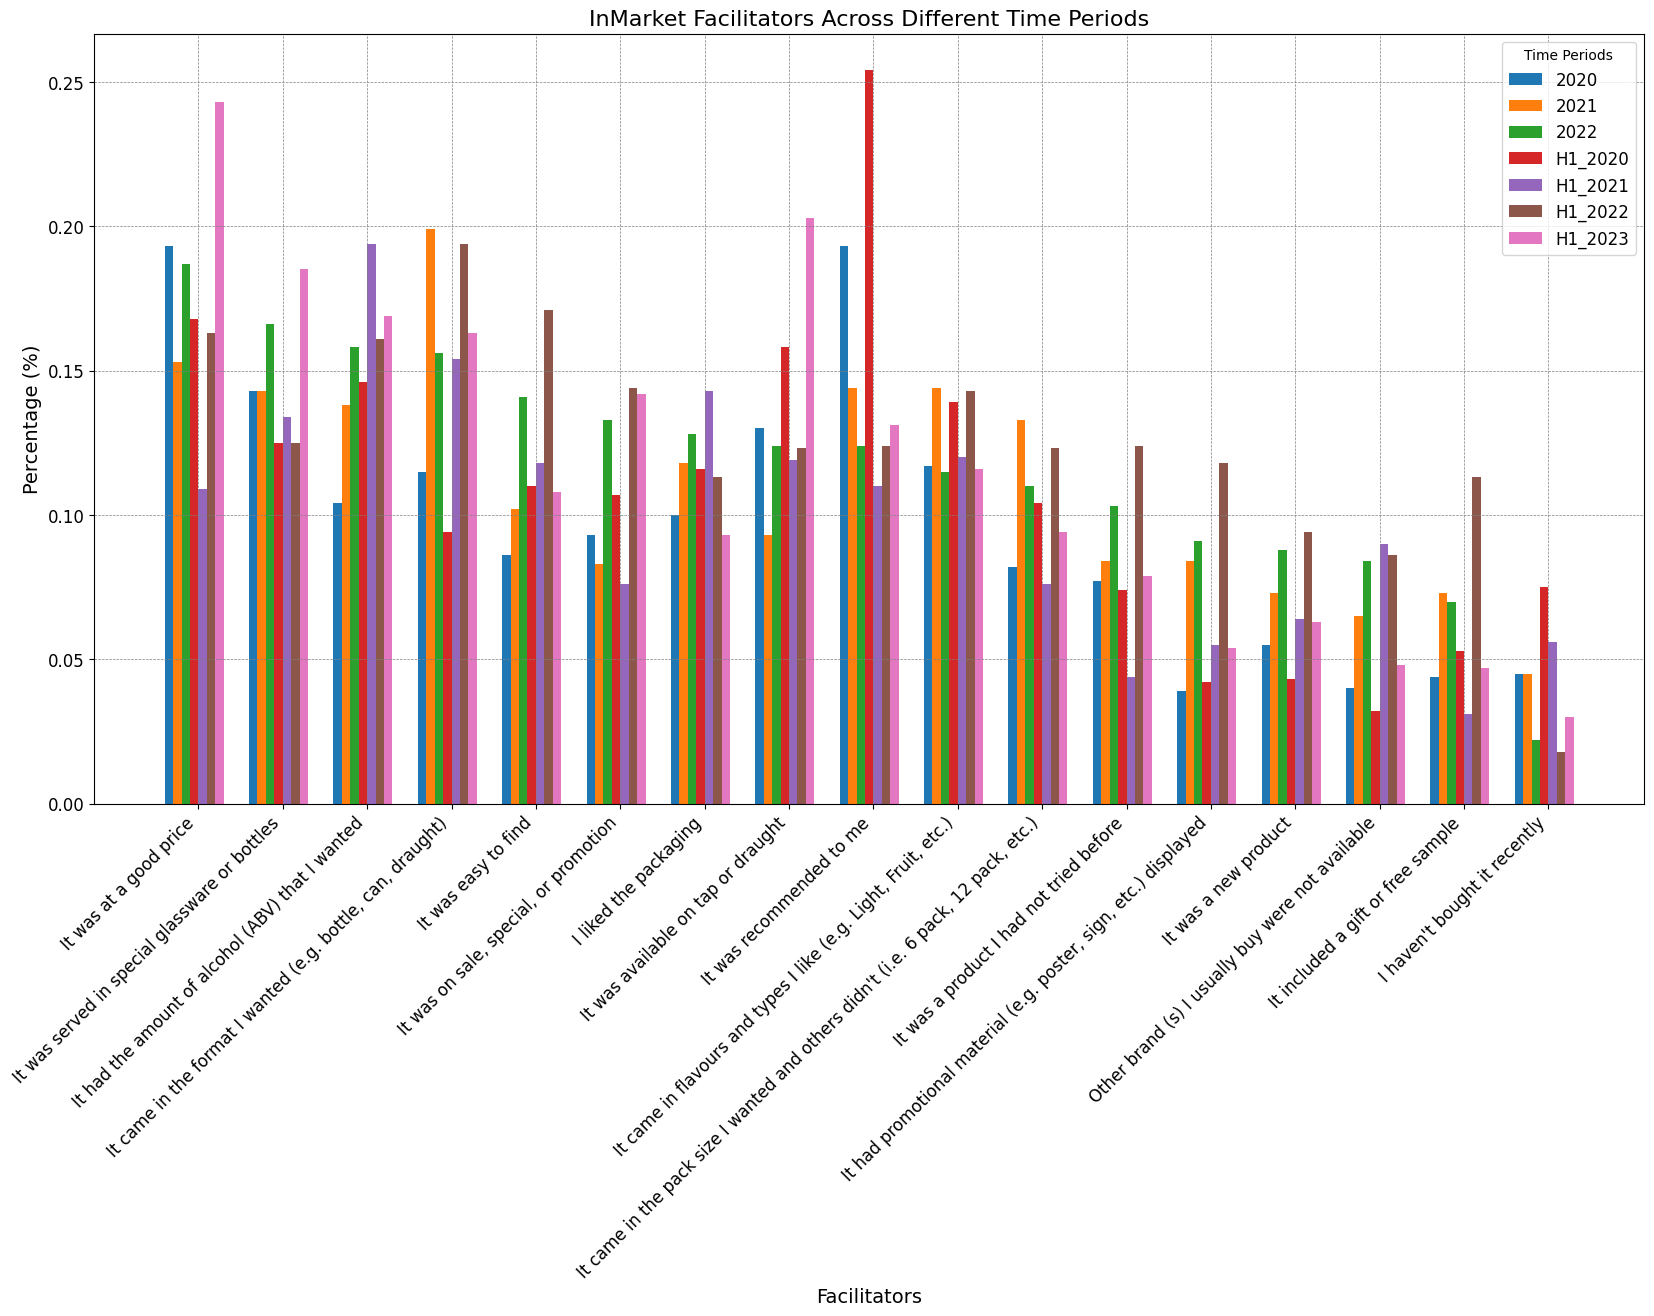

In [ ]:
# Renaming columns for easy access
data.columns = ['Facilitator', '2020', '2021', '2022', 'H1_2020', 'H1_2021', 'H1_2022', 'H1_2023']

# Preparing the data for the bar chart
facilitators = data['Facilitator']
time_periods = ['2020', '2021', '2022', 'H1_2020', 'H1_2021', 'H1_2022', 'H1_2023']
bar_width = 0.1  # Width of the bars

# Creating the combined bar chart for all years and half-year periods
plt.figure(figsize=(20, 10))

# Generating bars for each time period
for i, time_period in enumerate(time_periods):
    percentages = data[time_period]
    plt.bar(x=np.arange(len(facilitators)) + i * bar_width, height=percentages, width=bar_width, label=time_period)

# Setting chart details
plt.xlabel('Facilitators', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.title('InMarket Facilitators Across Different Time Periods', fontsize=16)
plt.xticks(ticks=np.arange(len(facilitators)) + bar_width * len(time_periods) / 2, labels=facilitators, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Time Periods', fontsize=12)
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')

# Show the combined plot
plt.show()


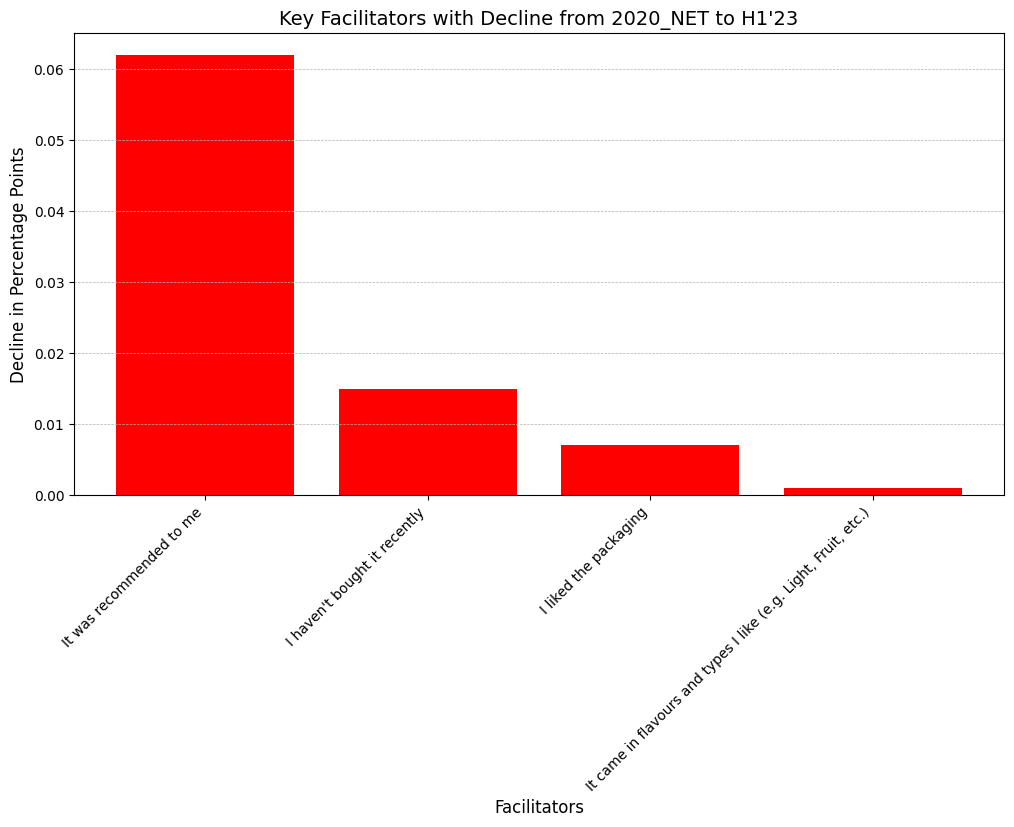

In [ ]:
# Renaming columns for easy access
data.columns = ['Facilitator', '2020_NET', '2021_NET', '2022_NET', 'H1_20', 'H1_21', 'H1_22', 'H1_23']

# Calculating the decline from 2020 to H1'23 for each facilitator
data['Decline'] = data['2020_NET'] - data['H1_23']

# Filtering facilitators that have shown a decline
declined_facilitators = data[data['Decline'] > 0]

# Sorting the facilitators based on the magnitude of decline
declined_facilitators_sorted = declined_facilitators.sort_values(by='Decline', ascending=False)

# Creating a bar chart for these facilitators showing their decline
plt.figure(figsize=(12, 6))
plt.bar(declined_facilitators_sorted['Facilitator'], declined_facilitators_sorted['Decline'], color='red')
plt.xlabel('Facilitators', fontsize=12)
plt.ylabel('Decline in Percentage Points', fontsize=12)
plt.title('Key Facilitators with Decline from 2020_NET to H1\'23', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()